# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
# Downloaded by clicking the given link

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

In [ ]:
with open ('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
consumer_key = 'mine'
consumer_secret = 'mine'
access_token = 'mine'
access_secret = 'mine'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = df_1.tweet_id.values

In [ ]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ': ' + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print('Time used:' + str(end - start))
print(fails_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [1]:
import pandas as pd

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [6]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [7]:
df_archive.query('rating_denominator != 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [8]:
df_im_pr = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
df_im_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_im_pr.sample(10)

tweet_id                                            jpg_url  \
1043  712668654853337088    https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg   
1859  842115215311396866    https://pbs.twimg.com/media/C6_LTCZWoAAKm_O.jpg   
1605  800443802682937345    https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg   
491   675534494439489536    https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg   
554   677644091929329666  https://pbs.twimg.com/ext_tw_video_thumb/67764...   
938   703631701117943808    https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg   
1894  849776966551130114    https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg   
1056  714606013974974464    https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg   
1474  780459368902959104    https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg   
1233  746131877086527488    https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
1043        1  Labrador_retriever  0.829058    True    golden_retriever   
1859        1                chow  0.293493    True        Newfoundland   
1605        1           mousetrap  0.777468   False         black_widow   
491         1                chow  0.749368    True          schipperke   
554         1           Chihuahua  0.626236    True   Italian_greyhound   
938         2        window_shade  0.909533   False       window_screen   
1894        2           Chihuahua  0.292092    True         toy_terrier   
1056        1     Norfolk_terrier  0.293007    True  Labrador_retriever   
1474        1          Great_Dane  0.382491    True     German_shepherd   
1233        1                chow  0.575637    True          Pomeranian   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1043  0.038664    True         Chihuahua  0.026221    True  
1859  0.181336    True        schipperke  0.125152    True  
1605  0.093940   False       paddlewheel  0.017492   False  
491   0.133738    True      Newfoundland  0.049914    True  
554   0.128483    True             swing  0.059840   False  
938   0.011427   False             brass  0.008882   False  
1894  0.136852    True            bonnet  0.103111   False  
1056  0.256198    True  golden_retriever  0.129643    True  
1474  0.312026    True      bull_mastiff  0.033272    True  
1233  0.195950    True   Norwich_terrier  0.141224    True

In [11]:
import json
tweet_id = []
retweet_count = []
favorite_count = []
df_count = pd.DataFrame()
with open('tweet_json.txt') as json_file:
    for line in json_file.readlines():
        temdic = json.loads(line)
        idstr = temdic['id_str']
        retct = temdic['retweet_count']
        favct = temdic['favorite_count']
        tweet_id.append(idstr)
        retweet_count.append(retct)
        favorite_count.append(favct)
df_count['tweet_id'] = tweet_id
df_count['retweet_count'] = retweet_count
df_count['favorite_count'] = favorite_count

In [12]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        940 non-null    object
 1   retweet_count   940 non-null    int64 
 2   favorite_count  940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [13]:
df_count.sample(10)

tweet_id  retweet_count  favorite_count
757  775898661951791106          15470               0
502  809920764300447744           3673           14750
586  798340744599797760           3133               0
72   878404777348136964           1071               0
128  866686824827068416           2957           17072
718  780800785462489090           1199            5177
631  792773781206999040           1569            6982
259  840728873075638272          14569               0
592  796904159865868288           8335               0
274  838476387338051585           4337           20930

### Quality issues
1.In df_archive, the timestamp is in string type instead of datetime.

2.In df_archive, the tweet_id is in int type instead of string.

3.In df_archive, some tweets have a retweeted status.

4.In df_archive.rating denominators, some values are not 10.

5.In df_im_pr.p1_dog, some values are False.

6.In df_im_pr, the tweet_id is in int type instead of string.

7.In df_im_pr.p1, some first letters are not in lower case.

8.In df_archive, some rows have multiple dog stage values.

9.In df_count.favorite_count, some values are 0.

### Tidiness issues
1.In df_archive, all dog stages should be in one single column.

2.The columns we would like to analyse on are located in separate dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
im_pr_clean = df_im_pr.copy()
count_clean = df_count.copy()

### Issue #1:

#### Define

#### In archive_clean, convert the data type of timestamp from string to datetime.

#### Code

In [15]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [16]:
archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

In [17]:
archive_clean['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue #2:

#### Define

#### In archive_clean, convert the data type of tweet_id from int to string.

#### Code

In [18]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('string')

#### Test

In [19]:
archive_clean.dtypes

tweet_id                                   string
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #3:

#### Define

#### In archive_clean, drop the rows that have a non-null value in the retweeted_status_id column.

#### Code

In [20]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [21]:
archive_clean = archive_clean.reset_index(drop=True)

#### Test

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   string             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #4:

#### Define

#### In archive_clean, among the rows where rating_denominator is not 10:
#### 1. drop the row where rating_denominator is 0
#### 2. drop the rows where rating_numerator is less than rating_denominator
#### 3. change the other denominators to 10, and change the corresponding numerators proportionally

#### Code

In [23]:
archive_clean.query('rating_denominator != 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
263   835246439529840640           8.352460e+17         2.625958e+07   
287   832088576586297345           8.320875e+17         3.058208e+07   
363   820690176645140481                    NaN                  NaN   
429   810984652412424192                    NaN                  NaN   
733   758467244762497024                    NaN                  NaN   
890   740373189193256964                    NaN                  NaN   
942   731156023742988288                    NaN                  NaN   
987   722974582966214656                    NaN                  NaN   
1024  716439118184652801                    NaN                  NaN   
1050  713900603437621249                    NaN                  NaN   
1075  710658690886586372                    NaN                  NaN   
1095  709198395643068416                    NaN                  NaN   
1172  704054845121142784                    NaN                  NaN   
1254  697463031882764288                    NaN                  NaN   
1419  686035780142297088           6.860340e+17         4.196984e+09   
1455  684225744407494656           6.842229e+17         4.196984e+09   
1456  684222868335505415                    NaN                  NaN   
1483  682962037429899265                    NaN                  NaN   
1484  682808988178739200           6.827884e+17         4.196984e+09   
1600  677716515794329600                    NaN                  NaN   
1664  675853064436391936                    NaN                  NaN   
2154  666287406224695296                    NaN                  NaN   

                     timestamp  \
263  2017-02-24 21:54:03+00:00   
287  2017-02-16 04:45:50+00:00   
363  2017-01-15 17:52:40+00:00   
429  2016-12-19 23:06:23+00:00   
733  2016-07-28 01:00:57+00:00   
890  2016-06-08 02:41:38+00:00   
942  2016-05-13 16:15:54+00:00   
987  2016-04-21 02:25:47+00:00   
1024 2016-04-03 01:36:11+00:00   
1050 2016-03-27 01:29:02+00:00   
1075 2016-03-18 02:46:49+00:00   
1095 2016-03-14 02:04:08+00:00   
1172 2016-02-28 21:25:30+00:00   
1254 2016-02-10 16:51:59+00:00   
1419 2016-01-10 04:04:10+00:00   
1455 2016-01-05 04:11:44+00:00   
1456 2016-01-05 04:00:18+00:00   
1483 2016-01-01 16:30:13+00:00   
1484 2016-01-01 06:22:03+00:00   
1600 2015-12-18 05:06:23+00:00   
1664 2015-12-13 01:41:41+00:00   
2154 2015-11-16 16:11:11+00:00   

                                                 source  \
263   <a href="http://twitter.com/download/iphone" r...   
287   <a href="http://twitter.com/download/iphone" r...   
363   <a href="http://twitter.com/download/iphone" r...   
429   <a href="http://twitter.com/download/iphone" r...   
733   <a href="http://twitter.com/download/iphone" r...   
890   <a href="http://twitter.com/download/iphone" r...   
942   <a href="http://twitter.com/download/iphone" r...   
987   <a href="http://twitter.com/download/iphone" r...   
1024  <a href="http://twitter.com/download/iphone" r...   
1050  <a href="http://twitter.com/download/iphone" r...   
1075  <a href="http://twitter.com/download/iphone" r...   
1095  <a href="http://twitter.com/download/iphone" r...   
1172  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1419  <a href="http://twitter.com/download/iphone" r...   
1455  <a href="http://twitter.com/download/iphone" r...   
1456  <a href="http://twitter.com/download/iphone" r...   
1483  <a href="http://twitter.com/download/iphone" r...   
1484  <a href="http://twitter.com/download/iphone" r...   
1600  <a href="http://twitter.com/download/iphone" r...   
1664  <a href="http://twitter.com/download/iphone" r...   
2154  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
263   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
287            @docmisterio account started on 11/15/15   

In [24]:
# First drop the row where the denominator is 0
archive_clean.drop(263, inplace = True)

In [25]:
for i in archive_clean.index:
    if archive_clean.at[i, 'rating_denominator'] != 10:
        if archive_clean.at[i, 'rating_numerator'] < archive_clean.at[i, 'rating_denominator']:
            archive_clean.drop(i, inplace=True)
        else:
            archive_clean.at[i, 'rating_numerator'] = round(archive_clean.at[i, 'rating_numerator'] / archive_clean.at[i, 'rating_denominator'] * 10)
            archive_clean.at[i, 'rating_denominator'] = 10

#### Test

In [26]:
archive_clean.shape

(2167, 17)

In [27]:
archive_clean.query('rating_denominator != 10')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [28]:
archive_clean.query('index == 429')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
429  810984652412424192                    NaN                  NaN   

                    timestamp  \
429 2016-12-19 23:06:23+00:00   

                                                source  \
429  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
429  Meet Sam. She smiles 24/7 &amp; secretly aspir...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
429                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
429  https://www.gofundme.com/sams-smile,https://tw...                34   

     rating_denominator name doggo floofer pupper puppo  
429                  10  Sam  None    None   None  None

### Issue #5:

#### Define

#### In im_pr_clean, remove the rows where p1_dog is False

#### Code

In [29]:
im_pr_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
im_pr_clean = im_pr_clean[im_pr_clean['p1_dog'] == True]

#### Test

In [31]:
im_pr_clean.shape

(1532, 12)

In [32]:
im_pr_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #6:

#### Define

#### In im_pr_clean, convert the data type of tweet_id from int to string 

#### Code

In [33]:
im_pr_clean['tweet_id'] = im_pr_clean['tweet_id'].astype('string')

#### Test

In [34]:
im_pr_clean.dtypes

tweet_id     string
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #7:

#### Define

#### In im_pr_clean, make all the letters in p1 lower case

#### Code

In [35]:
im_pr_clean['p1'] = im_pr_clean['p1'].str.lower()

#### Test

In [36]:
im_pr_clean.sample(10)

tweet_id                                            jpg_url  \
2024  881666595344535552    https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg   
1924  857263160327368704    https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg   
527   676617503762681856    https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg   
1885  847842811428974592    https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg   
1923  857029823797047296    https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg   
1957  865006731092295680    https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
2023  881536004380872706  https://pbs.twimg.com/ext_tw_video_thumb/88153...   
2017  880095782870896641    https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg   

      img_num                           p1   p1_conf  p1_dog  \
2024        1                       saluki  0.529012    True   
1924        1                      samoyed  0.998021    True   
527         1                    chihuahua  0.841084    True   
1885        1         bernese_mountain_dog  0.951337    True   
1923        2             golden_retriever  0.968623    True   
1957        1                     pembroke  0.989882    True   
44          1            italian_greyhound  0.618316    True   
26          1  soft-coated_wheaten_terrier  0.326467    True   
2023        1                      samoyed  0.281463    True   
2017        1           miniature_pinscher  0.120298    True   

                              p2   p2_conf  p2_dog                p3  \
2024                Afghan_hound  0.250003    True  golden_retriever   
1924                  Pomeranian  0.000922    True          keeshond   
527                   Pomeranian  0.120530    True          Pekinese   
1885  Greater_Swiss_Mountain_dog  0.016849    True       Appenzeller   
1923          Labrador_retriever  0.010325    True            Saluki   
1957                    Cardigan  0.009906    True           basenji   
44                    Weimaraner  0.151363    True            vizsla   
26                  Afghan_hound  0.259551    True            briard   
2023                      Angora  0.272066   False       Persian_cat   
2017         Rhodesian_ridgeback  0.106395    True            beagle   

       p3_conf  p3_dog  
2024  0.160739    True  
1924  0.000311    True  
527   0.006600    True  
1885  0.010849    True  
1923  0.004148    True  
1957  0.000135    True  
44    0.085989    True  
26    0.206803    True  
2023  0.114854   False  
2017  0.106073    True

### Issue #8:
#### In df_archive, some rows have multiple dog stage values. This issue will be fixed when fixing the first tidiness issue.

### Issue #9:

#### Define

#### In count_clean, drop the rows where favorite_count is 0.

#### Code

In [37]:
count_clean = count_clean.query('favorite_count != 0')

#### Test

In [38]:
len(count_clean) + len(df_count.query('favorite_count == 0')) == len(df_count)

True

### Issue #10 (1st tidiness issue):

#### Define

#### In archive_clean, melt the columns doggo, floofer, pupper, and puppo

#### Code

In [39]:
archive_clean['doggo'].value_counts()

None     2080
doggo      87
Name: doggo, dtype: int64

In [40]:
archive_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                  timestamp  \
0 2017-08-01 16:23:56+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [41]:
melted1 = pd.melt(archive_clean,
                  id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator'],
                  value_vars = ['doggo'],
                  var_name = 'stilldoggo',
                  value_name = 'dog_stage')
melted1 = melted1[melted1['dog_stage'] == 'doggo']
melted1 = melted1.drop('stilldoggo', axis = 1)

In [42]:
melted2 = pd.melt(archive_clean,
                  id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator'],
                  value_vars = ['floofer'],
                  var_name = 'stillfloofer',
                  value_name = 'dog_stage')
melted2 = melted2[melted2['dog_stage'] == 'floofer']
melted2 = melted2.drop('stillfloofer', axis = 1)

In [43]:
melted3 = pd.melt(archive_clean,
                  id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator'],
                  value_vars = ['pupper'],
                  var_name = 'stillpupper',
                  value_name = 'dog_stage')
melted3 = melted3[melted3['dog_stage'] == 'pupper']
melted3 = melted3.drop('stillpupper', axis = 1)

In [44]:
melted4 = pd.melt(archive_clean,
                  id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator'],
                  value_vars = ['puppo'],
                  var_name = 'stillpuppo',
                  value_name = 'dog_stage')
melted4 = melted4[melted4['dog_stage'] == 'puppo']
melted4 = melted4.drop('stillpuppo', axis = 1)

In [45]:
stage_none = archive_clean.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"')
stage_none = stage_none[['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'doggo']]
stage_none = stage_none.rename(columns={'doggo': 'dog_stage'})

In [46]:
frames = [melted1, melted2, melted3, melted4, stage_none]
archive_new = pd.concat(frames)

In [47]:
archive_new = archive_new.reset_index(drop=True)

In [48]:
duplicatedrows = archive_new[archive_new.duplicated(['tweet_id'])]
duplicatedrows

tweet_id                 timestamp  rating_numerator  \
88   854010172552949760 2017-04-17 16:34:26+00:00                11   
117  817777686764523521 2017-01-07 16:59:28+00:00                13   
122  808106460588765185 2016-12-12 00:29:28+00:00                12   
125  802265048156610565 2016-11-25 21:37:47+00:00                11   
126  801115127852503040 2016-11-22 17:28:25+00:00                12   
131  785639753186217984 2016-10-11 00:34:48+00:00                10   
132  781308096455073793 2016-09-29 01:42:20+00:00                12   
143  759793422261743616 2016-07-31 16:50:42+00:00                12   
147  751583847268179968 2016-07-09 01:08:47+00:00                 5   
162  741067306818797568 2016-06-10 00:39:48+00:00                12   
169  733109485275860992 2016-05-19 01:38:16+00:00                12   
337  855851453814013952 2017-04-22 18:31:02+00:00                13   

     rating_denominator dog_stage  
88                   10   floofer  
117                  10    pupper  
122                  10    pupper  
125                  10    pupper  
126                  10    pupper  
131                  10    pupper  
132                  10    pupper  
143                  10    pupper  
147                  10    pupper  
162                  10    pupper  
169                  10    pupper  
337                  10     puppo

In [49]:
archive_new.query('tweet_id == "854010172552949760"')

tweet_id                 timestamp  rating_numerator  \
8   854010172552949760 2017-04-17 16:34:26+00:00                11   
88  854010172552949760 2017-04-17 16:34:26+00:00                11   

    rating_denominator dog_stage  
8                   10     doggo  
88                  10   floofer

In [50]:
archive_new.query('tweet_id == "855851453814013952"')

tweet_id                 timestamp  rating_numerator  \
7    855851453814013952 2017-04-22 18:31:02+00:00                13   
337  855851453814013952 2017-04-22 18:31:02+00:00                13   

     rating_denominator dog_stage  
7                    10     doggo  
337                  10     puppo

In [51]:
archive_new.drop([7, 8, 117, 122, 125, 126, 131, 132, 143, 147, 162, 169], inplace=True)

In [52]:
archive_new = archive_new.reset_index(drop=True)

#### Test

In [53]:
len(archive_new) == len(archive_clean)

True

In [54]:
archive_new['dog_stage'].value_counts()

None       1823
pupper      224
doggo        85
puppo        25
floofer      10
Name: dog_stage, dtype: int64

### Issue #11 (2nd tidiness issue):

#### Define

#### Merge the columns we would like to analyse on together to 1 datadrame from the 3 separate dataframes.

#### Code

In [55]:
df_clean = pd.merge(archive_new, im_pr_clean, on='tweet_id', how='inner')
df_clean = pd.merge(df_clean, count_clean, on='tweet_id', how='inner')
df_clean = df_clean.drop(['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [56]:
df_clean.head()

tweet_id                 timestamp  rating_numerator  \
0  890240255349198849 2017-07-26 15:59:51+00:00                14   
1  884162670584377345 2017-07-09 21:29:42+00:00                12   
2  872967104147763200 2017-06-09 00:02:31+00:00                12   
3  871515927908634625 2017-06-04 23:56:03+00:00                12   
4  869596645499047938 2017-05-30 16:49:31+00:00                12   

   rating_denominator dog_stage                  p1   p1_conf  p1_dog  \
0                  10     doggo            pembroke  0.511319    True   
1                  10     doggo     german_shepherd  0.707046    True   
2                  10     doggo  labrador_retriever  0.476913    True   
3                  10     doggo            komondor  0.974781    True   
4                  10     doggo           chihuahua  0.955156    True   

   retweet_count  favorite_count  
0           6081           27857  
1           2494           17895  
2           4546           23990  
3           2928           17851  
4           2630           14146

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 578
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            579 non-null    object             
 1   timestamp           579 non-null    datetime64[ns, UTC]
 2   rating_numerator    579 non-null    int64              
 3   rating_denominator  579 non-null    int64              
 4   dog_stage           579 non-null    object             
 5   p1                  579 non-null    object             
 6   p1_conf             579 non-null    float64            
 7   p1_dog              579 non-null    bool               
 8   retweet_count       579 non-null    int64              
 9   favorite_count      579 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 45.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
archive_new.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The retweet count and the favorite count appear to have a positive linear relationship.

2.The top 3 breeds by retweet count are Golden Retriever, Pembroke, and Chihuahua.

3.High rating appears to lead to high retweet count and high favorite count.

### Visualization

In [59]:
import seaborn as sb; sb.set_theme(color_codes=True)
import matplotlib.pyplot as plt

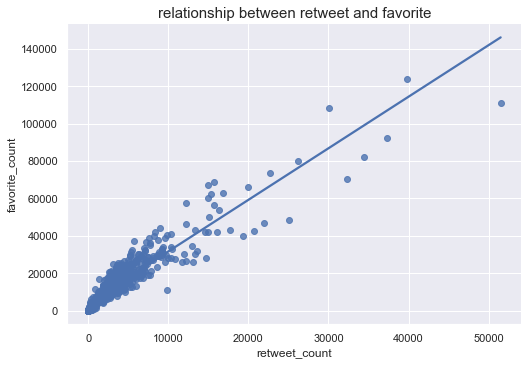

In [60]:
sb.lmplot(x = 'retweet_count',
          y = 'favorite_count',
          ci = None,
          data = count_clean,
          aspect = 1.5)
ax = plt.gca()
ax.set_title('relationship between retweet and favorite', fontsize=15)
plt.show()

In [61]:
df_clean['p1'].value_counts()

golden_retriever      68
pembroke              39
labrador_retriever    35
chihuahua             26
chow                  20
                      ..
cairn                  1
dandie_dinmont         1
standard_poodle        1
australian_terrier     1
lhasa                  1
Name: p1, Length: 101, dtype: int64

In [62]:
df_groupby_breed = df_clean.groupby(by='p1').sum().reset_index()
df_sortby_retweet = df_groupby_breed.sort_values(by=['retweet_count'], ascending = True).tail(10)
df_sortby_retweet

p1  rating_numerator  rating_denominator    p1_conf  \
22            cardigan               135                 110   6.522328   
74          pomeranian               183                 100   5.940552   
25                chow               243                 200  13.335160   
27      cocker_spaniel               170                 140   7.161689   
37      french_bulldog               175                 140  10.813087   
81             samoyed               178                 140  10.942550   
55  labrador_retriever               414                 350  24.782046   
24           chihuahua               298                 260  16.025955   
73            pembroke               469                 390  27.793746   
41    golden_retriever               840                 680  48.502242   

    p1_dog  retweet_count  favorite_count  
22      11          50387          188384  
74      10          57387          179118  
25      20          65197          267928  
27      14          72619          240832  
37      14          89669          379730  
81      14         100197          346971  
55      35         121015          521799  
24      26         125607          441176  
73      39         157715          663960  
41      68         279884         1094184

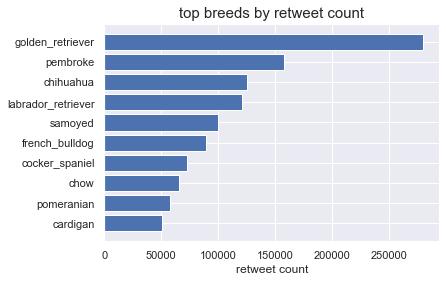

In [63]:
plt.barh(df_sortby_retweet['p1'], df_sortby_retweet['retweet_count'])
plt.title('top breeds by retweet count', fontsize = 15)
plt.xlabel('retweet count')
plt.savefig('breeds by retweet count.png', bbox_inches='tight')
plt.show()

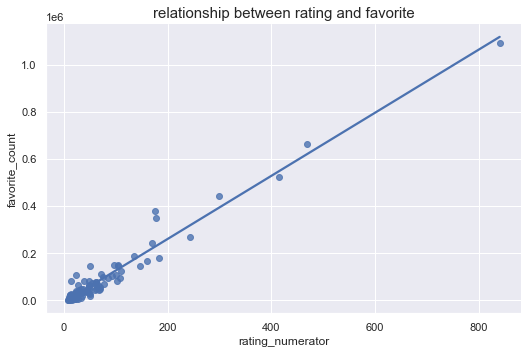

In [64]:
sb.lmplot(x = 'rating_numerator',
          y = 'favorite_count',
          ci = None,
          data = df_groupby_breed,
          aspect = 1.5)
ax_rf = plt.gca()
ax_rf.set_title('relationship between rating and favorite', fontsize=15)
plt.savefig('relationship between rating and favorite.png', bbox_inches='tight')
plt.show()

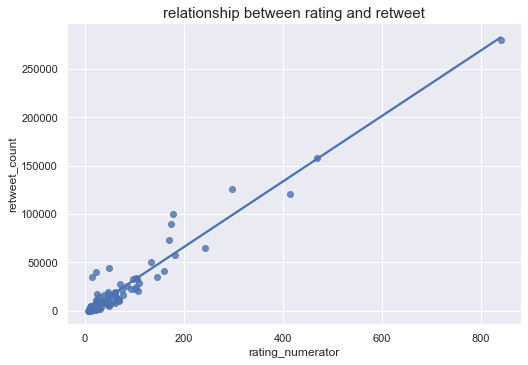

In [65]:
sb.lmplot(x = 'rating_numerator',
          y = 'retweet_count',
          ci = None,
          data = df_groupby_breed,
          aspect = 1.5)
ax_rr = plt.gca()
ax_rr.set_title('relationship between rating and retweet', fontsize=15)
plt.savefig('relationship between rating and retweet.png', bbox_inches='tight')
plt.show()